🐱🐶 **Cat vs Dog Image Classifier using CNN & Transfer Learning**

---
This project classifies images as either cats or dogs using Convolutional Neural Networks (CNNs) and Transfer Learning (VGG16). The goal is to compare performance between a custom CNN and a pre-trained model to understand model generalization and overfitting.



In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

**Importing the dataset**


---


- Dataset: [Kaggle Cat vs Dog](https://www.kaggle.com/datasets/tongpython/cat-and-dog)
- Classes: Cats (0), Dogs (1)
- Input size: 128x128x3 (resized)
- Training set: 8005 images
- Test set: 2023 images


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tongpython/cat-and-dog")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cat-and-dog


**Data Preprocessing**

---

- Using Generators to get detaset
- Normalizing values between 0 and 1
- Defining batch size of 32 images

In [3]:
# convert the images into a dataset using generator
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_ds = datagen.flow_from_directory(
    '/kaggle/input/cat-and-dog/training_set/training_set',
    target_size=(128,128),
    batch_size=32,
    class_mode='binary'
)
#  create test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_ds = test_datagen.flow_from_directory(
    '/kaggle/input/cat-and-dog/test_set/test_set',
    target_size=(128,128),
    batch_size=32,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [4]:
#  check if data is normalized
images, labels = next(train_ds)
print("Min pixel value:", images.min())
print("Max pixel value:", images.max())


Min pixel value: 0.0
Max pixel value: 1.0


{'cats': 0, 'dogs': 1}


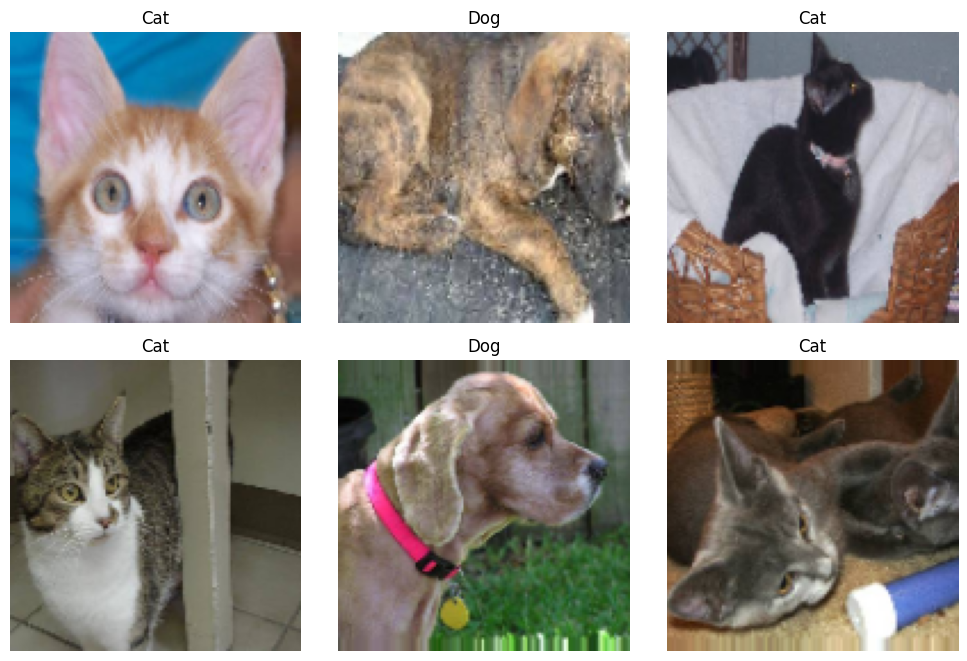

In [5]:
# check the dataset
print(train_ds.class_indices)
images, labels = next(train_ds)
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title("Dog" if labels[i] == 1 else "Cat")
    plt.axis('off')
plt.tight_layout()
plt.show()

**CNN Model**

---


In [6]:
#  start building the model

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((3,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((3,3)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 42, 42, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 40, 40, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,412,289 (5.39 MB)

 Trainable params: 1,412,289 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

**Model Training**

In [8]:
history = model.fit(train_ds,epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 75s 277ms/step - accuracy: 0.5059 - loss: 0.7015
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - accuracy: 0.5559 - loss: 0.6793
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 165ms/step - accuracy: 0.6560 - loss: 0.6275
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - accuracy: 0.7009 - loss: 0.5852
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 164ms/step - accuracy: 0.7194 - loss: 0.5510
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 166ms/step - accuracy: 0.7261 - loss: 0.5392
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 82s 168ms/step - accuracy: 0.7653 - loss: 0.5036
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 82s 166ms/step - accuracy: 0.7720 - loss: 0.4788
Epoch 9/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 82s 167ms/step - accuracy: 0.7703 - loss: 0.4858
Epoch 10/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 81s 165ms/step - accuracy: 0.7838 - loss: 0.4537


**Model Evaluation**

In [9]:
test_history = model.evaluate(test_ds)

64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 168ms/step - accuracy: 0.7715 - loss: 0.4730


**Loss and Accuracy**

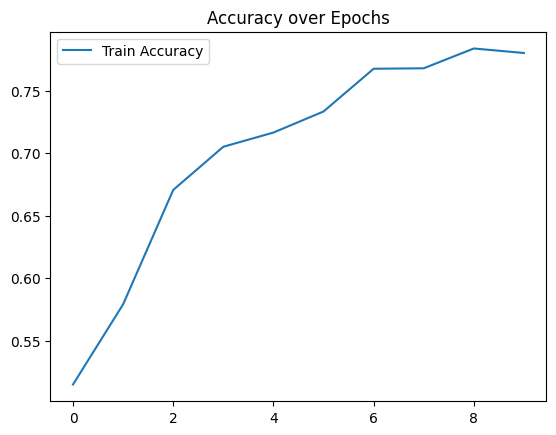

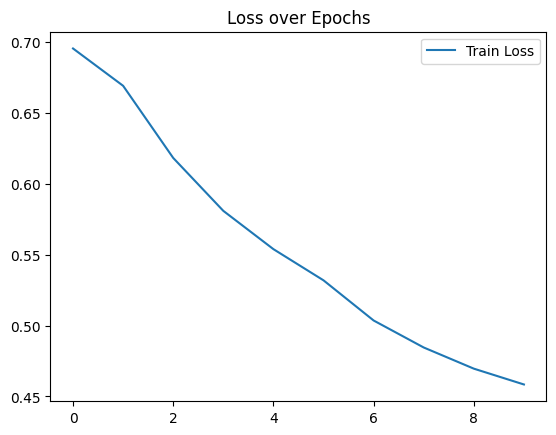

In [10]:
#  plot test for overfitting
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.legend()
plt.title("Loss over Epochs")
plt.show()


**Using tranfer learning : VGG16**

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 80s 259ms/step - accuracy: 0.7942 - loss: 0.4009 - val_accuracy: 0.9086 - val_loss: 0.2182
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 56s 223ms/step - accuracy: 0.9485 - loss: 0.1375 - val_accuracy: 0.9125 - val_loss: 0.2109
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 65s 258ms/step - accuracy: 0.9658 - loss: 0.0945 - val_accuracy: 0.9293 - val_loss: 0.1790
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 56s 224ms/step - accuracy: 0.9790 - loss: 0.0676 - val_accuracy: 0.9278 - val_loss: 0.1790
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 65s 257ms/step - accuracy: 0.9869 - loss: 0.0490 - val_accuracy: 0.9318 - val_loss: 0.1855
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.9294 - loss: 0.1726
Validation Accuracy: 0.9278


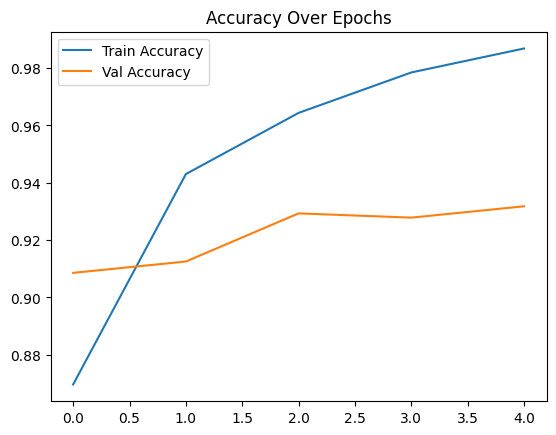

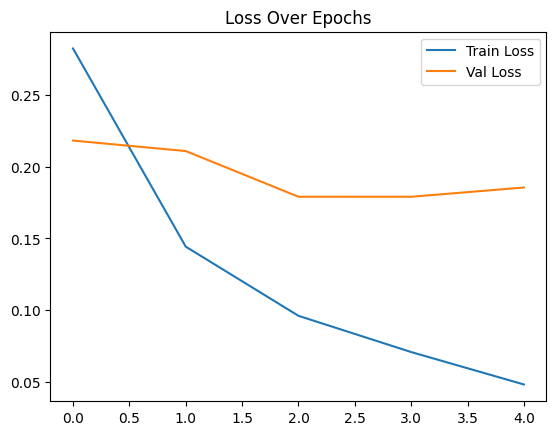

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1. Load and preprocess the training data
train_datagen = ImageDataGenerator(rescale=1./255)

train_ds = train_datagen.flow_from_directory(
    '/kaggle/input/cat-and-dog/training_set/training_set',  # adjust path if needed
    target_size=(224, 224),  # ✅ required for VGG16
    batch_size=32,
    class_mode='binary'
)

# 2. Load and preprocess the test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_ds = test_datagen.flow_from_directory(
    '/kaggle/input/cat-and-dog/test_set/test_set',
    target_size=(224, 224),  # ✅ match input shape
    batch_size=32,
    class_mode='binary'
)

# 3. Load VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in base_model.layers:
    layer.trainable = False

# 4. Build model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 5. Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 6. Fit model
history = model.fit(
    train_ds,
    epochs=5,
    validation_data=test_ds,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)]
)

# 7. Evaluate
loss, accuracy = model.evaluate(test_ds)
print(f"Validation Accuracy: {accuracy:.4f}")

# 8. Plot results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Over Epochs")
plt.show()

# 9. Save model
model.save('cat_dog_classifier_vgg16.h5')


**Conclusion**

- Custom CNN reached ~80% test accuracy.
- Model trained well without major overfitting, thanks to dropout layer
- Transfer learning (VGG16) performed better with less training time.
